<a href="https://colab.research.google.com/github/sanaipei001/Data-Visualization-Accelerate-Internship-/blob/main/marketing_data(Excelerate).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Import the required libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the Excel file
file_path = '/content/drive/MyDrive/Data Internship-Excelerate/Marketing Team Data - Sheet1.csv'
df = pd.read_csv(file_path)

In [ ]:
# Display the first 5 rows
print(df.head(5))

  campaign ID                             Campaign Name  \
0  Campaign 1          SHU_6 (Educators and Principals)   
1  Campaign 1          SHU_6 (Educators and Principals)   
2  Campaign 1          SHU_6 (Educators and Principals)   
3  Campaign 1          SHU_6 (Educators and Principals)   
4  Campaign 2  SHU3_ (Students Apart from India and US)   

                   Audience    Age  \
0  Educators and Principals  25-34   
1  Educators and Principals  35-44   
2  Educators and Principals  45-54   
3  Educators and Principals  55-64   
4                  Students  18-24   

                                           Geography  Reach  Impressions  \
0  Group 1 (Australia, Canada, United Kingdom, Gh...  11387        23283   
1  Group 1 (Australia, Canada, United Kingdom, Gh...   8761        15683   
2  Group 1 (Australia, Canada, United Kingdom, Gh...   2867         6283   
3  Group 1 (Australia, Canada, United Kingdom, Gh...    889         1890   
4  Group 2 (Australia, Canada, Unite

In [ ]:
# Check data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

In [ ]:
# Check for missing values
print(df.isnull().sum())

campaign ID                                     0
Campaign Name                                   0
Audience                                        0
Age                                             0
Geography                                       0
Reach                                           0
Impressions                                     0
Frequency                                       0
Clicks                                          0
Unique Clicks                                   0
Unique Link Clicks (ULC)                        0
Click-Through Rate (CTR in %)                   0
Unique Click-Through Rate (Unique CTR in %)     0
Amount Spent in INR                             0
Cost Per Click (CPC)                            0
Cost per Result (CPR)                           0
@dropdown                                      33
@dropdown.1                                    33
dtype: int64


In [ ]:
# Drop '@dropdown' columns
df = df.drop(columns=['@dropdown', '@dropdown.1'], errors='ignore')
# Clean 'Amount Spent in INR' column (remove '$' and convert to numeric)
df['Amount Spent in INR'] = df['Amount Spent in INR'].replace('[\$,]', '', regex=True).astype(float)

# Verify data types again
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   campaign ID                                  33 non-null     object 
 1   Campaign Name                                33 non-null     object 
 2   Audience                                     33 non-null     object 
 3   Age                                          33 non-null     object 
 4   Geography                                    33 non-null     object 
 5   Reach                                        33 non-null     int64  
 6   Impressions                                  33 non-null     int64  
 7   Frequency                                    33 non-null     float64
 8   Clicks                                       33 non-null     int64  
 9   Unique Clicks                                33 non-null     int64  
 10  Uniq

In [ ]:
# Summary statistics for key metrics
key_metrics = ['Cost Per Click (CPC)', 'Cost per Result (CPR)',
               'Click-Through Rate (CTR in %)', 'Unique Click-Through Rate (Unique CTR in %)',
               'Amount Spent in INR']
print(df[key_metrics].describe())

       Click-Through Rate (CTR in %)  \
count                      33.000000   
mean                        4.814848   
std                         2.901926   
min                         1.670000   
25%                         2.590000   
50%                         3.980000   
75%                         6.620000   
max                        12.950000   

       Unique Click-Through Rate (Unique CTR in %)  Amount Spent in INR  
count                                    33.000000            33.000000  
mean                                      5.144242           366.321515  
std                                       2.481334           298.627967  
min                                       2.030000            47.260000  
25%                                       3.610000           117.900000  
50%                                       4.420000           283.170000  
75%                                       6.530000           487.520000  
max                                      12.130

In [ ]:
# Clean 'Amount Spent in INR' if needed
df['Amount Spent in INR'] = df['Amount Spent in INR'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Group by Campaign ID and calculate aggregates

# Clean cost columns before aggregation
for col in ['Cost Per Click (CPC)', 'Cost per Result (CPR)', 'Amount Spent in INR']:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float, errors='ignore')
    #If errors='ignore', invalid parsing will return the input.
    #This is useful for strings that are not expected to be numbers.

campaign_summary = df.groupby('campaign ID').agg({
    'Amount Spent in INR': 'sum',
    'Cost Per Click (CPC)': 'mean',
    'Cost per Result (CPR)': 'mean',
    'Click-Through Rate (CTR in %)': 'mean',
    'Unique Click-Through Rate (Unique CTR in %)': 'mean',
    'Reach': 'sum',
    'Impressions': 'sum',
    'Clicks': 'sum'
}).reset_index()

# Display the summary
print(campaign_summary)

    campaign ID  Amount Spent in INR  Cost Per Click (CPC)  \
0    Campaign 1              2333.33              1.835000   
1   Campaign 10               856.67              7.453333   
2   Campaign 11               897.68              4.813333   
3    Campaign 2              1579.02              0.413333   
4    Campaign 3               850.68              7.920000   
5    Campaign 4               923.96              5.503333   
6    Campaign 5               837.78              1.283333   
7    Campaign 6               955.21              0.675000   
8    Campaign 7              1035.24              0.723333   
9    Campaign 8               942.78              0.346667   
10   Campaign 9               876.26              3.583333   

    Cost per Result (CPR)  Click-Through Rate (CTR in %)  \
0                5.130000                       2.730000   
1               18.650000                       3.626667   
2                9.570000                       8.933333   
3              

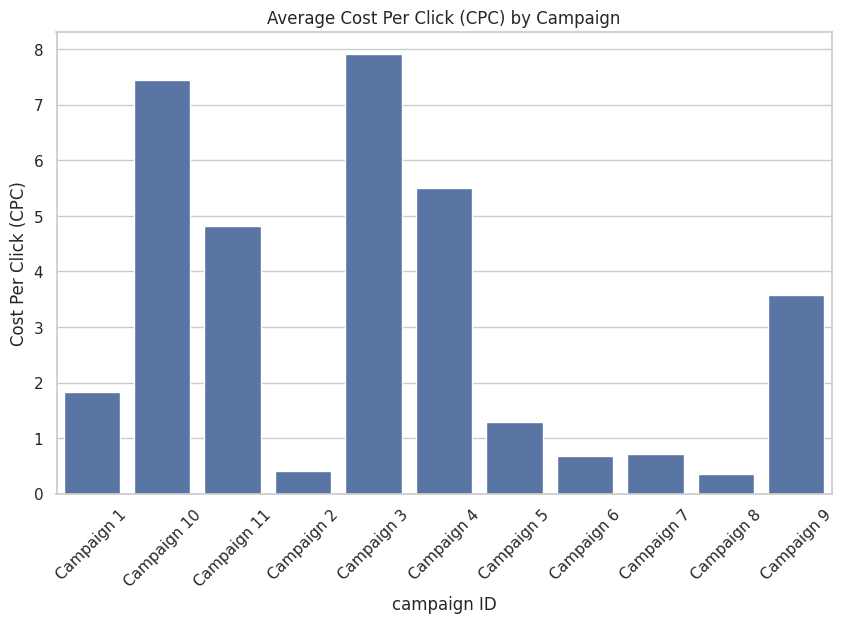

In [ ]:
# Set seaborn style
sns.set(style='whitegrid')

# Plot 1: Average CPC by Campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign ID', y='Cost Per Click (CPC)', data=campaign_summary)
plt.title('Average Cost Per Click (CPC) by Campaign')
plt.xticks(rotation=45)
plt.show()

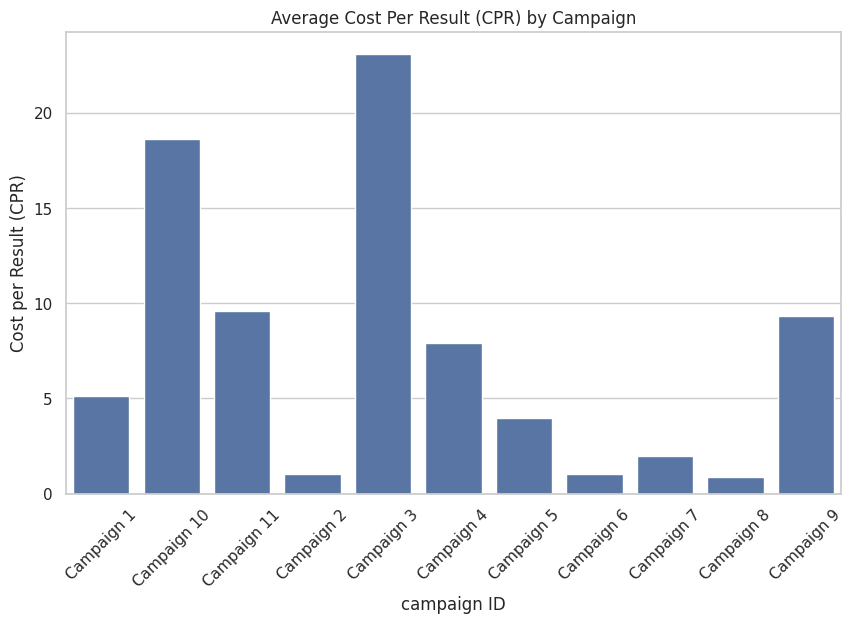

In [ ]:
# Plot 2: Average CPR by Campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign ID', y='Cost per Result (CPR)', data=campaign_summary)
plt.title('Average Cost Per Result (CPR) by Campaign')
plt.xticks(rotation=45)
plt.show()

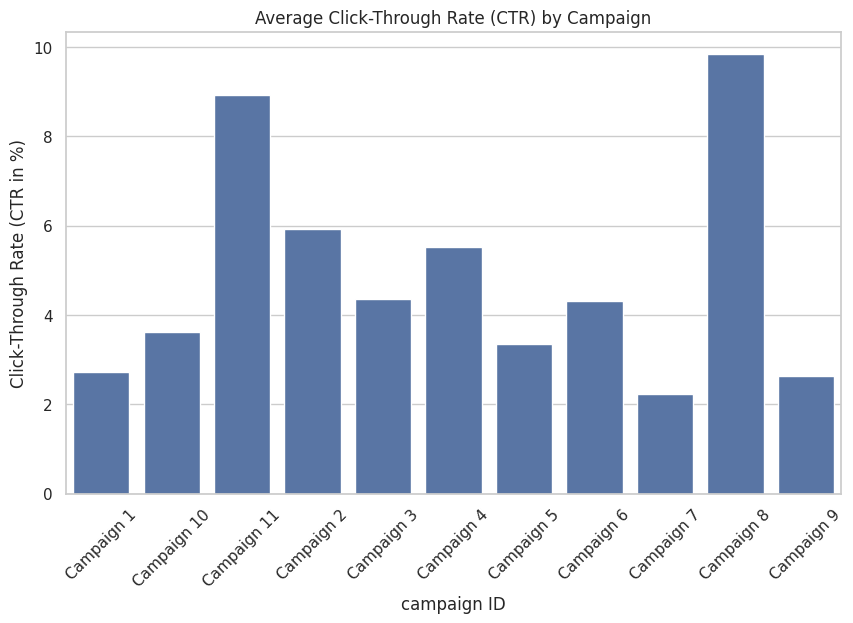

In [ ]:
# Plot 3: Average CTR by Campaign
plt.figure(figsize=(10, 6))
sns.barplot(x='campaign ID', y='Click-Through Rate (CTR in %)', data=campaign_summary)
plt.title('Average Click-Through Rate (CTR) by Campaign')
plt.xticks(rotation=45)
plt.show()

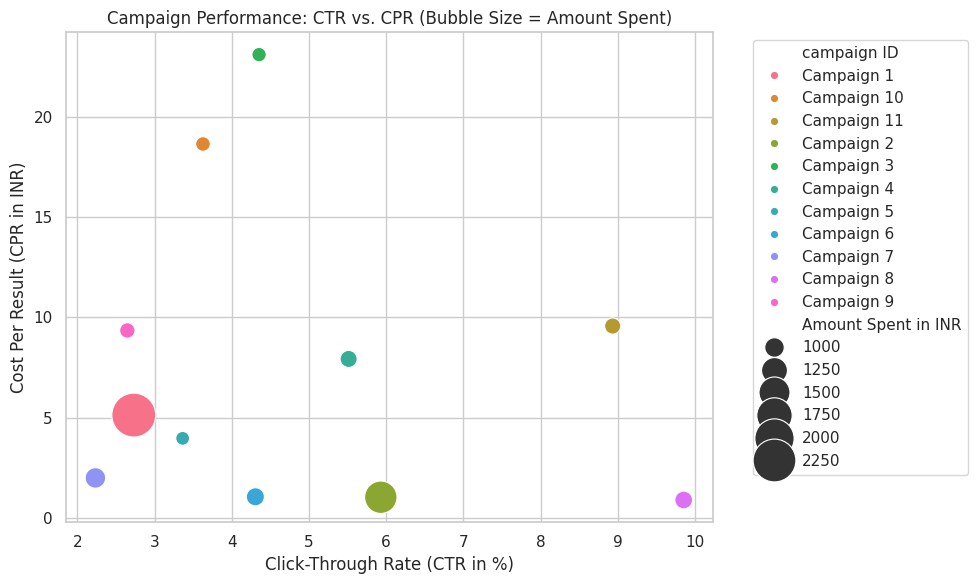

In [ ]:
# Scatter plot: CTR vs. CPR
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Click-Through Rate (CTR in %)',
    y='Cost per Result (CPR)',
    size='Amount Spent in INR',
    hue='campaign ID',
    data=campaign_summary,
    sizes=(100, 1000)
)
plt.title('Campaign Performance: CTR vs. CPR (Bubble Size = Amount Spent)')
plt.xlabel('Click-Through Rate (CTR in %)')
plt.ylabel('Cost Per Result (CPR in INR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate percentiles
cpc_75 = df['Cost Per Click (CPC)'].quantile(0.75)
cpr_75 = df['Cost per Result (CPR)'].quantile(0.75)
ctr_25 = df['Click-Through Rate (CTR in %)'].quantile(0.25)
unique_ctr_25 = df['Unique Click-Through Rate (Unique CTR in %)'].quantile(0.25)

print(f"75th Percentile CPC: {cpc_75}")
print(f"75th Percentile CPR: {cpr_75}")
print(f"25th Percentile CTR: {ctr_25}")
print(f"25th Percentile Unique CTR: {unique_ctr_25}")

75th Percentile CPC: 5.49
75th Percentile CPR: 11.11
25th Percentile CTR: 2.59
25th Percentile Unique CTR: 3.61


In [ ]:
# Flag underperforming campaigns
df['Underperforming'] = (
    (df['Cost Per Click (CPC)'] > cpc_75) &
    (df['Cost per Result (CPR)'] > cpr_75) &
    (df['Click-Through Rate (CTR in %)'] < ctr_25) &
    (df['Unique Click-Through Rate (Unique CTR in %)'] < unique_ctr_25)
)

In [ ]:
# Filter underperforming campaigns
underperforming_campaigns = df[df['Underperforming']][[
    'campaign ID', 'Campaign Name', 'Age', 'Geography',
    'Cost Per Click (CPC)', 'Cost per Result (CPR)',
    'Click-Through Rate (CTR in %)', 'Unique Click-Through Rate (Unique CTR in %)',
    'Amount Spent in INR'
]]
print("Underperforming Campaigns:")
print(underperforming_campaigns)

Underperforming Campaigns:
    campaign ID            Campaign Name    Age  Geography  \
7    Campaign 3  SHU_Students(Australia)  13-17  Australia   
27  Campaign 10         SHU_Students(UK)  13-17         UK   

    Cost Per Click (CPC)  Cost per Result (CPR)  \
7                   7.80                  16.99   
27                  7.07                  14.77   

    Click-Through Rate (CTR in %)  \
7                            2.33   
27                           2.35   

    Unique Click-Through Rate (Unique CTR in %)  Amount Spent in INR  
7                                          2.42               475.85  
27                                         2.35               487.52  


In [ ]:
# Recommendation
print("Recommendation: Discontinue Campaign 3 (SHU_Students(Australia)) due to high CPC ($7.80), high CPR ($16.99), low CTR (2.33%), and moderate spend ($475.85).")

Recommendation: Discontinue Campaign 3 (SHU_Students(Australia)) due to high CPC ($7.80), high CPR ($16.99), low CTR (2.33%), and moderate spend ($475.85).
